In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
%matplotlib inline

In [3]:
d=pd.read_excel('comp.xlsx')

In [4]:
d.head()

,data
0,110
1,110
2,111
3,111
4,111


In [5]:
x=d['data']

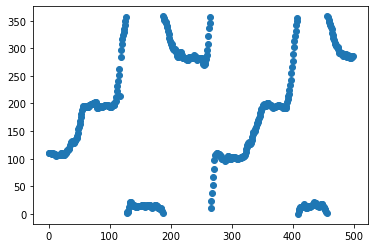

In [6]:
plt.scatter(list(range(len(x))),d['data'])

In [9]:
#increasing order
def inx(x,i):
    s=0
    r=0
    v=0
    k=10
    l=5
    if(i+k>=500):
        k=500-i-1
    if(i+l>=500):
        l=500-i-1
    for j in range(l):
        if(x[i+j]<x[i+j+1]):
            r=r+1
    for j in range(k):
        if(x[i+j]<=x[i+j+1]):
            s=s+(x[i+j+1]-x[i+j])
            v=v+1
    if(s<=15):
        return 0
    else:
        if(v==k or r==l):
            return 1
    return 0

In [10]:
#decreasing order
def inx1(x,i):
    s=0
    r=0
    v=0
    k=10
    l=5
    if(i+k>=500):
        k=500-i-1
    if(i+l>=500):
        l=500-i-1
    for j in range(l):
        if(x[i+j]>x[i+j+1]):
            r=r+1
    for j in range(k):
        if(x[i+j]>=x[i+j+1]):
            s=s+(x[i+j]-x[i+j-1])
            v=v+1
    if(s<=15):
        return 0
    else:
        if(v==k or r==l):
            return 1
    return 0

In [11]:
#basic version
l=[]
q=[]
s=x[0]
a=0
b=0
f=0
for i in range(1,500):
    z=abs(x[i]-x[i-1])
    l.append(min(z,360-z))
    y=abs(x[i]-s)
    y=(min(y,360-y))
    if(x[i-1]<=x[i]):
        if(f==0):
            if(inx(x,i-1)):
                right=i
                s=x[right]
                f=1
    if(y>=80 and y<=100):
        v=0
        k=10
        if(i+k>=500):
            k=500-i-1
        for j in range(k):
            if(x[i+j]<=x[i+j+1]):
                v=v+1
        if(v<k//2):
            s=x[i]
            f=0
            print('Turn',right,i)
    if(y>=170 and y<=190):
        print("U",right,i)
        s=x[i]
        f=0

Turn 27 76
U 109 133
Turn 109 204
U 256 271
Turn 317 375
U 386 410


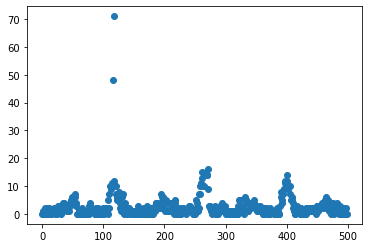

In [16]:
plt.scatter(list(range(len(l))),l)

In [32]:
#complete version
s=x[0]
a=0
f=0
g=0
b=0
i=0
rt=[]
lt=[]
ru=[]
lu=[]
while(i<499):
    i=i+1
    y=abs(x[i]-s)
    y=(min(y,360-y))
    if(x[i-1]<=x[i] and g==0):
        if(f==0 and g==0):
            if(inx(x,i-1)):
                right=i-1
                #print("insr "+str(right))
                s=x[right]
                f=1
        if(y>=65 and y<=125):
            v=0
            k=10
            if(i+k>=500):
                k=500-i-1
            for j in range(k):
                if(x[i+j]<x[i+j+1]):
                    v=v+1
            if(v<k//2):
                j=i
                while(x[j]<x[j+1] and j<500):
                    j=j+1
                j=j+6
                f=0
                print('Right Turn',s,x[j],right,j)
                rt.append([right,j])
                s=x[j]
                i=j
                right=j
        if(y>=170 and y<=190):
            j=i
            while(x[j]<x[j+1] and j<500):
                j=j+1
            j=j+6
            f=0
            print("RU",s,x[j],right,j)
            ru.append([right,j])
            s=x[j]
            i=j
            right=j
    elif(x[i-1]>=x[i] and f==0):
        if(f==0 and g==0):
            if(inx1(x,i-1)):
                #print("insl "+str(i-1))
                left=i-1
                s=x[left]
                g=1
        if(y>=65 and y<=125):
            v=0
            k=10
            if(i+k>=500):
                k=500-i-1
            for j in range(k):
                if(x[i+j]>x[i+j+1]):
                    v=v+1
            if(v<k//2):
                j=i
                while(x[j]>x[j+1] and j<500):
                    j=j+1
                j=j+6
                g=0
                print('Left Turn',s,x[j],left,j)
                lt.append([left,j])
                s=x[j]
                i=j
                left=j
                if(left==189):
                    print(i)
        if(y>=170 and y<=190):
            j=i
            while(x[j]>x[j+1] and j<500):
                j=j+1
            j=j+6
            g=0
            print("LU",s,x[j],left,j)
            rt.append([left,j])
            s=x[j]
            i=j
            left=j

Right Turn 106 193 26 63
RU 198 16 108 140
Left Turn 358 288 188 218
RU 270 108 255 280
Right Turn 102 201 316 359
RU 191 17 385 419
Left Turn 18 286 449 483


In [33]:
print(rt)
print(ru)
print(lt)
print(lu)

[[26, 63], [316, 359]]
[[108, 140], [255, 280], [385, 419]]
[[188, 218], [449, 483]]
[]


In [17]:
import shutil
import os

In [29]:
#to create folders for turns data
# Directory
d=[]
d.append(["Right Turn",rt])
d.append(["Left Turn",lt])
d.append(["Right U Turn",ru])
d.append(["Left U Turn",lu])
  
# Parent Directory path
parent_dir = "G:\TCS Xplore\Intern\Sources\DATA\Compass"
  
# Path
for i in d:
    path = os.path.join(parent_dir,i[0])
    os.mkdir(path)
    #print(path)
    pd=path
    for j in range(len(i[1])):
        path=os.path.join(pd,str(j))
        #print(path)
        os.mkdir(path)

In [35]:
img="G:\TCS Xplore\Intern\Sources\DATA\Compass\Car's view\VID20210429155101 "

In [39]:
#copying images where vehicle takes turn to turns folders 
for i in d:
    pd = os.path.join(parent_dir,i[0])
    for j in range(len(i[1])):
        path=os.path.join(pd,str(j))
        #print(path)
        for k in range(i[1][j][0],i[1][j][1]+1):
            m=str(k)
            if(len(m)<3):
                m='0'*(3-len(m))+m
            print(img+m+'.jpg')
            shutil.copy(img+m+'.jpg',path)

G:\TCS Xplore\Intern\Sources\DATA\Compass\Car's view\VID20210429155101 026.jpg
G:\TCS Xplore\Intern\Sources\DATA\Compass\Car's view\VID20210429155101 027.jpg
G:\TCS Xplore\Intern\Sources\DATA\Compass\Car's view\VID20210429155101 028.jpg
G:\TCS Xplore\Intern\Sources\DATA\Compass\Car's view\VID20210429155101 029.jpg
G:\TCS Xplore\Intern\Sources\DATA\Compass\Car's view\VID20210429155101 030.jpg
G:\TCS Xplore\Intern\Sources\DATA\Compass\Car's view\VID20210429155101 031.jpg
G:\TCS Xplore\Intern\Sources\DATA\Compass\Car's view\VID20210429155101 032.jpg
G:\TCS Xplore\Intern\Sources\DATA\Compass\Car's view\VID20210429155101 033.jpg
G:\TCS Xplore\Intern\Sources\DATA\Compass\Car's view\VID20210429155101 034.jpg
G:\TCS Xplore\Intern\Sources\DATA\Compass\Car's view\VID20210429155101 035.jpg
G:\TCS Xplore\Intern\Sources\DATA\Compass\Car's view\VID20210429155101 036.jpg
G:\TCS Xplore\Intern\Sources\DATA\Compass\Car's view\VID20210429155101 037.jpg
G:\TCS Xplore\Intern\Sources\DATA\Compass\Car's view

G:\TCS Xplore\Intern\Sources\DATA\Compass\Car's view\VID20210429155101 213.jpg
G:\TCS Xplore\Intern\Sources\DATA\Compass\Car's view\VID20210429155101 214.jpg
G:\TCS Xplore\Intern\Sources\DATA\Compass\Car's view\VID20210429155101 215.jpg
G:\TCS Xplore\Intern\Sources\DATA\Compass\Car's view\VID20210429155101 216.jpg
G:\TCS Xplore\Intern\Sources\DATA\Compass\Car's view\VID20210429155101 217.jpg
G:\TCS Xplore\Intern\Sources\DATA\Compass\Car's view\VID20210429155101 218.jpg
G:\TCS Xplore\Intern\Sources\DATA\Compass\Car's view\VID20210429155101 449.jpg
G:\TCS Xplore\Intern\Sources\DATA\Compass\Car's view\VID20210429155101 450.jpg
G:\TCS Xplore\Intern\Sources\DATA\Compass\Car's view\VID20210429155101 451.jpg
G:\TCS Xplore\Intern\Sources\DATA\Compass\Car's view\VID20210429155101 452.jpg
G:\TCS Xplore\Intern\Sources\DATA\Compass\Car's view\VID20210429155101 453.jpg
G:\TCS Xplore\Intern\Sources\DATA\Compass\Car's view\VID20210429155101 454.jpg
G:\TCS Xplore\Intern\Sources\DATA\Compass\Car's view

G:\TCS Xplore\Intern\Sources\DATA\Compass\Car's view\VID20210429155101 390.jpg
G:\TCS Xplore\Intern\Sources\DATA\Compass\Car's view\VID20210429155101 391.jpg
G:\TCS Xplore\Intern\Sources\DATA\Compass\Car's view\VID20210429155101 392.jpg
G:\TCS Xplore\Intern\Sources\DATA\Compass\Car's view\VID20210429155101 393.jpg
G:\TCS Xplore\Intern\Sources\DATA\Compass\Car's view\VID20210429155101 394.jpg
G:\TCS Xplore\Intern\Sources\DATA\Compass\Car's view\VID20210429155101 395.jpg
G:\TCS Xplore\Intern\Sources\DATA\Compass\Car's view\VID20210429155101 396.jpg
G:\TCS Xplore\Intern\Sources\DATA\Compass\Car's view\VID20210429155101 397.jpg
G:\TCS Xplore\Intern\Sources\DATA\Compass\Car's view\VID20210429155101 398.jpg
G:\TCS Xplore\Intern\Sources\DATA\Compass\Car's view\VID20210429155101 399.jpg
G:\TCS Xplore\Intern\Sources\DATA\Compass\Car's view\VID20210429155101 400.jpg
G:\TCS Xplore\Intern\Sources\DATA\Compass\Car's view\VID20210429155101 401.jpg
G:\TCS Xplore\Intern\Sources\DATA\Compass\Car's view

In [37]:
d

[['Right Turn', [[26, 63], [316, 359]]],
 ['Left Turn', [[188, 218], [449, 483]]],
 ['Right U Turn', [[108, 140], [255, 280], [385, 419]]],
 ['Left U Turn', []]]

In [ ]:
files = ['file1.txt', 'file2.txt', 'file3.txt']

In [ ]:
for f in files:
    shutil.copy(f, 'dest_folder')

In [ ]:
inx(x,64)

In [ ]:
x[356]-x[332]

In [ ]:
import numpy as np
from scipy.signal import argrelextrema

In [ ]:
x=np.array(x)

In [ ]:
# for local maxima
argrelextrema(x, np.greater)

In [ ]:
# for local minima
argrelextrema(x, np.less)